In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

x = [3,4,1,2,5,6,7,8,2,4]
h = [1.0/3.0, 1.0/3.0, 1.0/3.0]

def basic_convolution(x, h):
  h_reversed = h[::-1]
  x_padded = [0] * (len(h) - 1) + x + [0] * (len(h) - 1)
  output = []
  for index in range(len(x) + len(h) - 1):
    output.append(sum([x_padded[index:index + len(h)][i] * h_reversed[i] for i in range(len(h))]))
  return output

print(basic_convolution(x, h))
def fft_convolve1d(x,h): #1d cross correlation, fft
    """ 1D convolution, using FFT """
    x_padded = [0] * (len(h) - 1) + x + [0] * (len(h) - 1)
    h_padded = [0] * 6 + h + [0] * 5
    x_fft = np.fft.fft(x_padded)
    h_fft = np.fft.fft(h_padded)
    inverse = np.real(np.fft.ifft(x_fft*h_fft))
    return np.fft.fftshift(inverse)

print(fft_convolve1d(x, h))

[1.0, 2.333333333333333, 2.6666666666666665, 2.333333333333333, 2.6666666666666665, 4.333333333333333, 6.0, 7.0, 5.666666666666667, 4.666666666666666, 2.0, 1.3333333333333333]
[7.61295788e-16 1.00000000e+00 2.33333333e+00 2.66666667e+00
 2.33333333e+00 2.66666667e+00 4.33333333e+00 6.00000000e+00
 7.00000000e+00 5.66666667e+00 4.66666667e+00 2.00000000e+00
 1.33333333e+00 1.26882631e-16]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Index of DC component before shift: 0
Index of DC component after shift: 66150
21611.333333333332 21611.333333333332
22049.666666666668
I calculated the frequency in 2 different ways, both resulting in similar results, however an audio comparison is way off of what I expected.


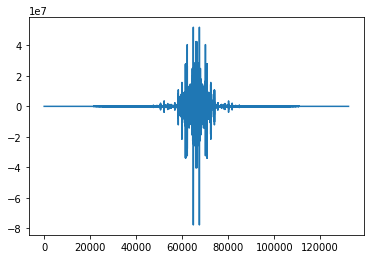

In [5]:

from scipy.io import wavfile
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt

clip = wavfile.read('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/clip.wav')
corc = wavfile.read('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Corcovado.wav')
clip_freq = clip[0]
corc_freq = corc[0]
clip = clip[1].astype(float)[:,1]
corc = corc[1].astype(float)[:,1]

corc_sample = corc[122*corc_freq:125*corc_freq]
corc_fft = np.fft.fft(corc_sample)
print("Index of DC component before shift: " + str(np.where(corc_fft.imag == 0)[0][0]))

corc_fft_shift = np.fft.fftshift(corc_fft)
print("Index of DC component after shift: " + str(np.where(corc_fft_shift.imag == 0)[0][0]))
plt.plot(corc_fft_shift)

peaks = np.argsort(corc_fft_shift)[:2]
sax_freq1 = corc_freq * np.min(peaks) / corc_sample.size
sax_freq2 = corc_freq * (corc_sample.size - np.max(peaks)) / corc_sample.size
print(sax_freq1, sax_freq2)
print(np.max(np.fft.fftfreq(corc_sample.size) * corc_freq))
print("I calculated the frequency in 2 different ways, both resulting in similar results, however an audio comparison is way off of what I expected.")

In [7]:
ns = np.linspace(0, 1, 128)
xn = np.cos(2 * np.pi * ns)

In [35]:
def npointdft(xn, N):
  out = np.zeros(N)
  for k in range(N):
    output = 0
    for n in range(N):
      output += xn[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    out[k] = output
  return out

In [47]:
def separate(xn, N):
  return xn[:N:2], xn[1:N:2]

In [70]:
def myfft(xn, N):
  if N < 2:
    return xn
  else:
    x1, x2 = separate(xn, N)
    out1, out2 = myfft(x1, N//2), myfft(x2, N//2)
    out = np.zeros(N)
    for k in range(N // 2):
      out[k] = out1[k] + out2[k] * np.exp(-1j * 2 * np.pi * k / N)
      out[k + N // 2] = out1[k] - out2[k] * np.exp(-1j * 2 * np.pi * k / N)
  return out

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

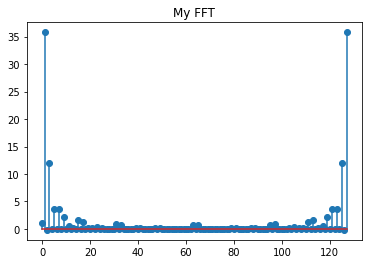

In [78]:
plt.figure()
plt.title('My FFT')
plt.stem(myfft(xn, 128))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

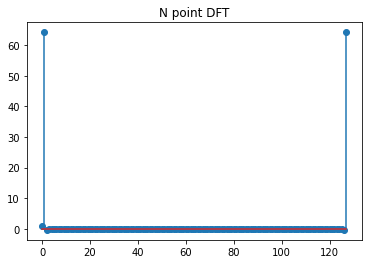

In [79]:
plt.figure()
plt.title("N point DFT")
plt.stem(npointdft(xn, 128))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


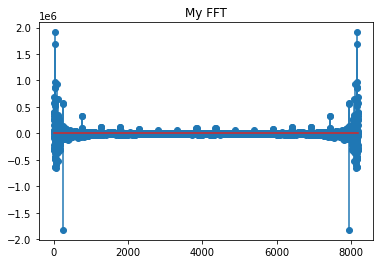

In [80]:
import time
myclip = clip[:8192]

time1 = time.time()
plt.figure()
plt.title('My FFT')
plt.stem(myfft(myclip, 8192))
time2 = time.time()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


My FFT time: 6.848345756530762
N point DFT time: 297.3723518848419


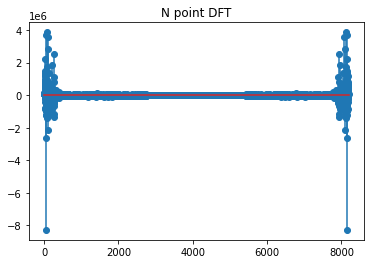

In [81]:
plt.figure()
plt.title("N point DFT")
plt.stem(npointdft(myclip, 8192))
time3 = time.time()

print("My FFT time: " + str(time2 - time1))
print("N point DFT time: " + str(time3 - time2))